In [44]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [45]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [46]:
# data: The flattened pixel values of the images (each image is flattened into a 64-length array).
# images: The original 8x8 images as 2D arrays.
# target: The labels for each digit (0 through 9).
# DESCR: A description of the dataset.
# target_names: The names of the target classes (digits 0-9).
digits['data']
len(digits['images'])

1797

In [47]:
# Target refers to the labels for each digit (0 through 9).
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [50]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)
len(X_train)
len(X_test)

360

In [51]:
# Call the Logistic Regression dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

s:\Code\ML_Code\Logistic_Regression\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# What is the score of the model
model.score(X_test, y_test)

0.9583333333333334

In [53]:
# What is the label of 67
digits.target[67]

np.int64(6)

In [54]:
# Lets predict
model.predict([digits.data[67]])

array([6])

In [55]:
# Lets predict the digis 0,1,2,3,4
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [56]:
# Lets see which number are not being predicted well
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1, 31,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]])

Text(50.722222222222214, 0.5, 'Truth')

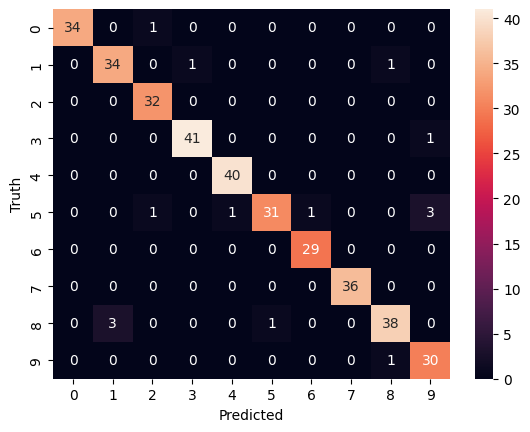

In [57]:
# We can see it better here
# For example the number 1 is miss represented as 2, sometimes the numbers are not well represented
import seaborn as sn
plt.Figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
